load our data from kaggle

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d datamunge/sign-language-mnist

 94% 59.0M/62.6M [00:00<00:00, 124MB/s]
100% 62.6M/62.6M [00:00<00:00, 113MB/s]


In [4]:
from zipfile import ZipFile
dataset='/content/sign-language-mnist.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


import important libraries

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


extract our data

In [8]:
train_data=pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test_data=pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')



In [14]:
# len_data
print(len(train_data))

print(len(test_data))

27455
7172


convert dataset to np array

In [15]:
train_np=np.array(train_data,dtype='float32')
test_np=np.array(test_data,dtype='float32')


labeling

In [16]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

check and plot images

In [17]:
im=random.randint(1,train_data.shape[0])

Lable for the image is: M


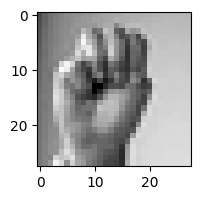

In [19]:
fig1,ax1=plt.subplots(figsize=(2,2))
plt.imshow(train_np[im,1:].reshape((28,28)),cmap='gray')
print("Lable for the image is:",class_names[int(train_np[im,0])])

normalization

In [20]:
x_train=train_np[:,1:]/255.
x_test=test_np[:,1:]/255.


catigorical our lables

In [31]:
y_train=train_np[:,0]
y_train_cat=to_categorical(y_train,num_classes=25)

In [32]:
y_test=test_np[:,0]
y_test_cat=to_categorical(y_test,num_classes=25)

reshape

In [33]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))


Bild model

In [34]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(25,activation='softmax'))



In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [37]:
history=model.fit(x_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_cat))

Epoch 1/10
215/215 [==============================] - 33s 148ms/step - loss: 2.6421 - accuracy: 0.1926 - val_loss: 1.5825 - val_accuracy: 0.5095
Epoch 2/10
215/215 [==============================] - 31s 143ms/step - loss: 1.1547 - accuracy: 0.6093 - val_loss: 0.8348 - val_accuracy: 0.7177
Epoch 3/10
215/215 [==============================] - 31s 146ms/step - loss: 0.6863 - accuracy: 0.7658 - val_loss: 0.5536 - val_accuracy: 0.8054
Epoch 4/10
215/215 [==============================] - 31s 144ms/step - loss: 0.4671 - accuracy: 0.8422 - val_loss: 0.4113 - val_accuracy: 0.8555
Epoch 5/10
215/215 [==============================] - 30s 140ms/step - loss: 0.3240 - accuracy: 0.8905 - val_loss: 0.3722 - val_accuracy: 0.8705
Epoch 6/10
215/215 [==============================] - 32s 150ms/step - loss: 0.2383 - accuracy: 0.9197 - val_loss: 0.2767 - val_accuracy: 0.9152
Epoch 7/10
215/215 [==============================] - 29s 137ms/step - loss: 0.1874 - accuracy: 0.9380 - val_loss: 0.2664 - val_ac

Accuracy

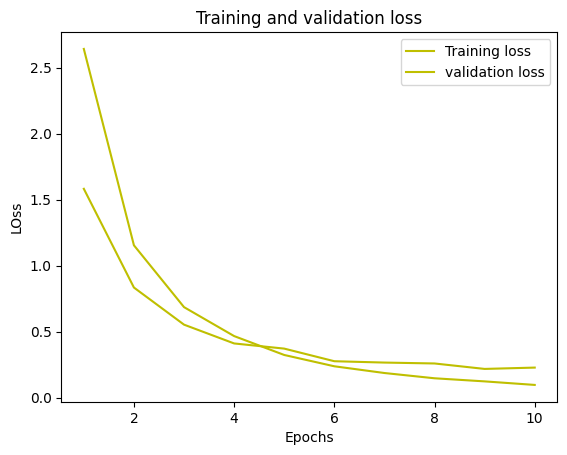

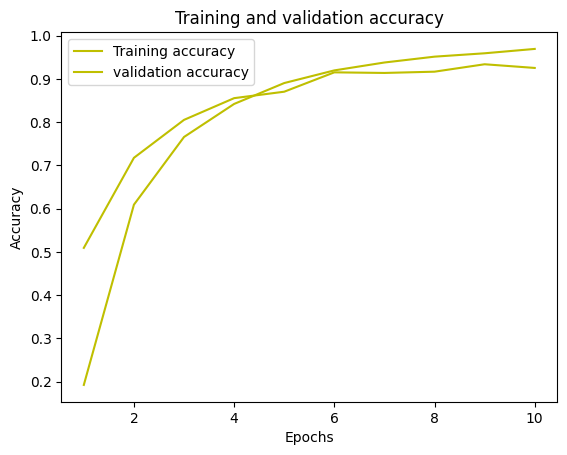

In [47]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'y',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('LOss')
plt.legend()
plt.show()

accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'y',label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Prediction

In [49]:
prediction=model.predict(x_test)

225/225 [==============================] - 3s 12ms/step


Lable for the image is: A
True Lable is: A


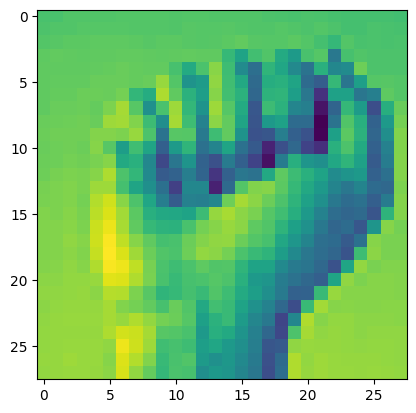

In [75]:
im=random.randint(1,len(prediction))
plt.imshow(x_test[im,:,:,0])
print("Lable for the image is:",class_names[int(prediction[im,24])])
print("True Lable is:",class_names[int(y_test[im])])


Lable for the image is: A
True Lable is: W


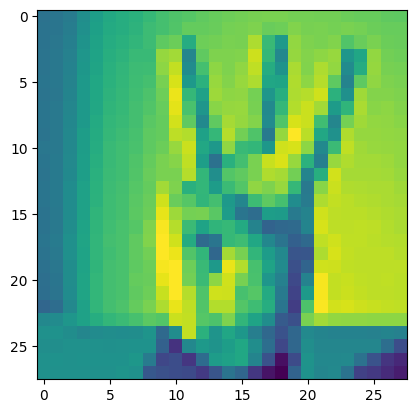

In [77]:
im=random.randint(1,len(prediction))
plt.imshow(x_test[im,:,:,0])
print("Lable for the image is:",class_names[int(prediction[im,24])])
print("True Lable is:",class_names[int(y_test[im])])